In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ys = np.linspace(0.4, 2.4, 81)
ys = np.linspace(0.4, 1.7, 53)

In [4]:
ys = np.array([f"{y:.3f}".rstrip('0').rstrip('.') for y in ys], dtype=float)

In [105]:
np.where(ys==0.65)[0]

array([10])

In [6]:
data_files = ['data/fold_[{}]_ts.txt'.format(y) for y in ys]
# data_files = ['data/cusp_[{}]_ts.txt'.format(y) for y in ys]

In [7]:
data = [np.loadtxt(f) for f in data_files]

In [8]:
data_files_y = ['data/fold_[{}]_Ft.txt'.format(y) for y in ys]
# data_files_y = ['data/cusp_[{}]_Ft.txt'.format(y) for y in ys]

In [9]:
data_y = [np.loadtxt(f) for f in data_files_y]

In [10]:
data_y[0]

array([0.19187701, 1.53190459, 1.53760904, ..., 1.74348789, 1.76423136,
       1.69059207])

In [67]:
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

def iden_log_peak(y):
    y_smooth = gaussian_filter1d(y, sigma=1)
    peaks, properties = find_peaks(y_smooth, height=0.5, distance=10, prominence=0.1)

    return peaks

def iden_discontinuities(x, y):
    peaks, _ = find_peaks(y, prominence=0.5, distance=10)
    
    dy = np.diff(y)
    dx = np.diff(x)
    gradient = dy / dx
    
    # Set a threshold to detect sharp changes (potential discontinuities)
    threshold = np.percentile(np.abs(gradient), 99.99)  # Top 5% of changes
    potential_discontinuities = np.where(np.abs(gradient) > threshold)[0]
    
    # Remove points near peaks
    peak_mask = np.zeros_like(gradient, dtype=bool)
    for peak in peaks:
        peak_mask[max(0, peak - 10):min(len(gradient), peak + 10)] = True
    
    discontinuities = [idx for idx in potential_discontinuities if not peak_mask[idx]]

    return discontinuities
    

In [13]:
np.where(ys==0.6)[0]

array([8])

In [17]:
target_y = np.linspace(0, 12, 4)

(0.0, 6.0)

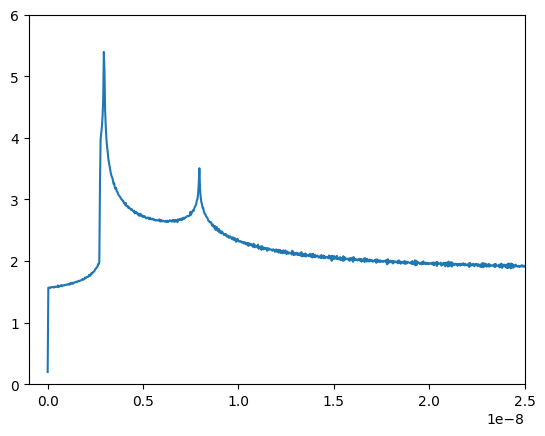

In [30]:
plt.plot(data[8][:], data_y[8][:])
plt.xlim(-1e-9, 0.25e-7)
plt.ylim(0, 6)

[ 0 56]
[ 2 58]
[ 0 68 69]
[ 2 70 71]
[0]
[2]
[0]
[2]


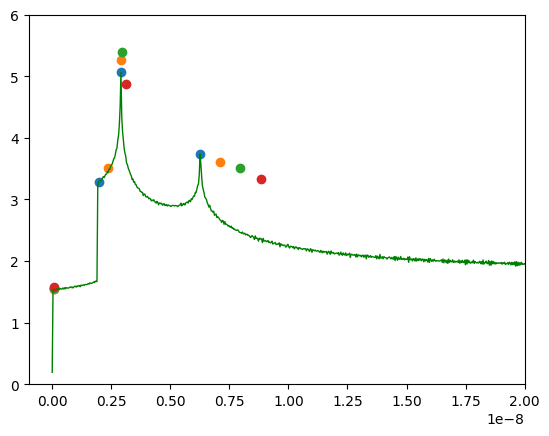

In [68]:
plt.plot(data[0][:], data_y[0][:], color='green', linewidth = 1)
plt.xlim(-1e-9, 0.2e-7)
plt.ylim(0, 6)

# plt.plot(data[4][:], data_y[4][:], color='cyan',   linewidth = 1)

# plt.plot(data[8][:], data_y[8][:], color='red', linewidth = 1)



for index in target_y:
    index = int(index)
    # plt.plot(data[index][:], data_y[index][:], color='black')

    args2 = iden_log_peak(data_y[index][:])
    args1 = np.array(iden_discontinuities(data[index][:], data_y[index][:]))
    print(args1)
    args1 +=2

    print(args1)
    args = np.concatenate((args1, args2))

    threshold = 2  # Minimum distance between points
    filtered_points = [args[0]]  # Start with the first point
    
    for i in range(1, len(args)):
        dist = np.linalg.norm(args[i] - filtered_points[-1])  # Euclidean distance
        if dist >= threshold:
            filtered_points.append(args[i])

    args = np.array(filtered_points)
    plt.scatter(data[index][args], data_y[index][args])

plt.show()

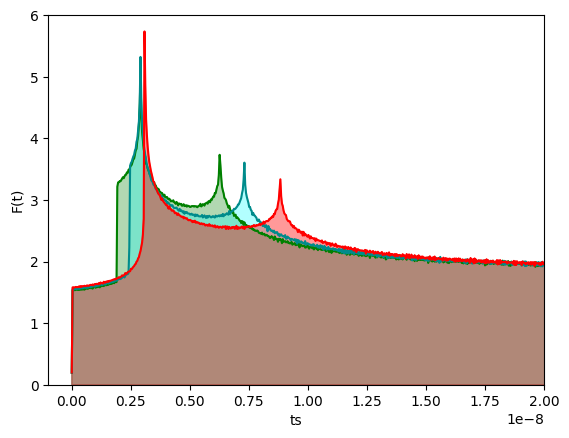

In [119]:
plt.plot(data[0][:], data_y[0][:], color='green')
plt.fill_between(data[0][:], data_y[0][:], color="green", alpha=0.3, label="Peak 1 Area")

plt.plot(data[5][:], data_y[5][:], color='darkcyan')
plt.fill_between(data[5][:], data_y[5][:], color="cyan", alpha=0.3, label="Peak 1 Area")

plt.plot(data[12][:], data_y[12][:], color='red')
plt.fill_between(data[12][:], data_y[12][:], color="red", alpha=0.4, label="Peak 1 Area")





plt.xlim(-1e-9, 0.2e-7)
plt.ylim(0, 6)
plt.xlabel('ts')
plt.ylabel('F(t)')
plt.savefig('merging.png')

12
[ 92 261] 2
[  2 261] tt
20
[113 315] 2
[  2 315] tt
28
[144 373] 2
[  2 373] tt


Text(0, 0.5, 'F(t)')

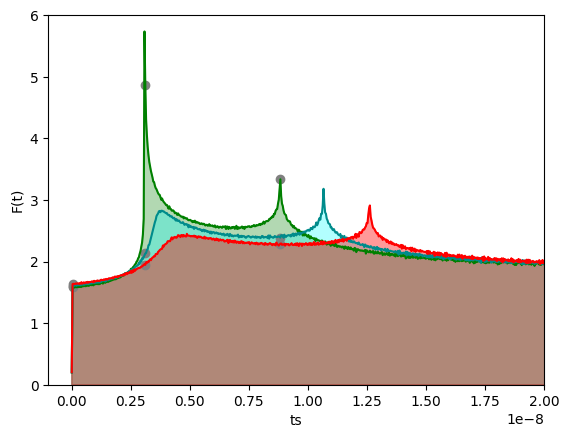

In [132]:
plt.plot(data[12][:], data_y[12][:], color='green')
plt.fill_between(data[12][:], data_y[12][:], color="green", alpha=0.3, label="Peak 1 Area")

plt.plot(data[20][:], data_y[20][:], color='darkcyan')
plt.fill_between(data[20][:], data_y[20][:], color="cyan", alpha=0.3, label="Peak 1 Area")

plt.plot(data[28][:], data_y[28][:], color='red')
plt.fill_between(data[28][:], data_y[28][:], color="red", alpha=0.4, label="Peak 1 Area")

indices = [12, 20, 28]
for index in indices:
    index = int(index)
    print(index)
    # plt.plot(data[index][:], data_y[index][:], color='black')

    args2 = iden_log_peak(data_y[index][:])
    print(args2, '2')
    args1 = np.array(iden_discontinuities(data[index][:], data_y[index][:]))
    # print(args1)
    args1 +=2

    # print(args1)
    # args = args1 + args2
    args = np.concatenate((args1, args2))
    args = np.array([args[0], args[-1]])
    print(args, 'tt')
    
    # threshold = 2  # Minimum distance between points
    # filtered_points = [args[0]]  # Start with the first point
    
    # for i in range(1, len(args)):
    #     dist = np.linalg.norm(args[i] - filtered_points[-1])  # Euclidean distance
    #     if dist >= threshold:
    #         filtered_points.append(args[i])

    args = np.array(filtered_points)
    plt.scatter(data[index][args], data_y[index][args], color='grey')
    args=np.array([])


plt.xlim(-1e-9, 0.2e-7)
plt.ylim(0, 6)
plt.xlabel('ts')
plt.ylabel('F(t)')
# plt.savefig('smoothened.png')

(0.0, 6.0)

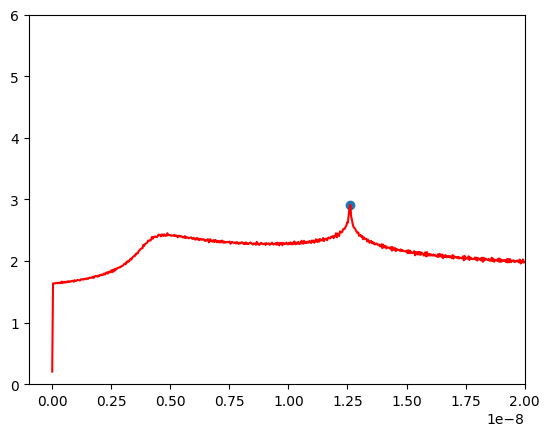

In [130]:
plt.plot(data[28][:], data_y[28][:], color='red')
# args = iden_log_peak(data_y[28][:])
# print(args)
plt.scatter(data[28][373], data_y[28][373])
plt.xlim(-1e-9, 0.2e-7)
plt.ylim(0, 6)

### x = np.linspace(0, 10, 500)
peak1 = np.exp(-(x - 3)**2)  # First peak
peak2 = np.exp(-(x - 7)**2)  # Second peak
merged_peak = peak1 + peak2  # Simulate merging

# Plot
plt.plot(x, peak1, label="Peak 1", linestyle="--", color="blue", alpha=0.7)
plt.plot(x, peak2, label="Peak 2", linestyle="--", color="orange", alpha=0.7)
plt.plot(x, merged_peak, label="Merged Peak", color="green", linewidth=2)

# Annotate merging point
merge_point_x = 5
merge_point_y = np.exp(-(merge_point_x - 3)**2) + np.exp(-(merge_point_x - 7)**2)
plt.scatter(merge_point_x, merge_point_y, color="red", label="Merging Point")
plt.annotate("Merging", xy=(merge_point_x, merge_point_y), xytext=(merge_point_x + 0.5, merge_point_y + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.legend()
plt.xlabel("x")
plt.ylabel("Intensity")
plt.title("Static Representation of Merging Peaks")

plt.fill_between(x, peak1, color="blue", alpha=0.3, label="Peak 1 Area")
plt.fill_between(x, peak2, color="orange", alpha=0.3, label="Peak 2 Area")
plt.fill_between(x, merged_peak, color="green", alpha=0.3, label="Merged Peak Area")

plt.show()

In [11]:
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

In [12]:
def save_animation(anim, filename='animation.mp4', fps=30):
    """
    Save an existing matplotlib animation as MP4.
    
    Parameters:
    anim: The animation object
    filename (str): Output filename, should end with .mp4
    fps (int): Frames per second for the output video
    """
    # Set up the writer with the desired settings
    writer = FFMpegWriter(fps=fps, bitrate=2000)
    
    # Save the animation
    anim.save(filename, writer=writer)



In [27]:
# from scipy.signal import find_peaks

# from scipy.ndimage import gaussian_filter1d
# y_smooth = gaussian_filter1d(data_y[0][:], sigma=1)

# peaks, properties = find_peaks(y_smooth, height=0.5, distance=10, prominence=0.1)

In [28]:
# peaks

array([ 86, 185])

(0.0, 6.0)

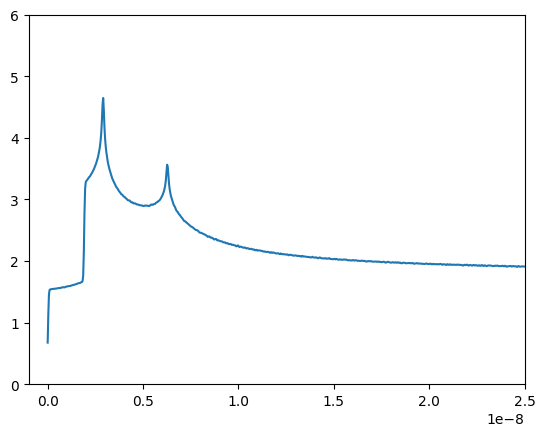

In [32]:
# plt.plot(data[0][:], y_smooth)
# plt.xlim(-1e-9, 0.25e-7)
# plt.ylim(0, 6)

(0.0, 6.0)

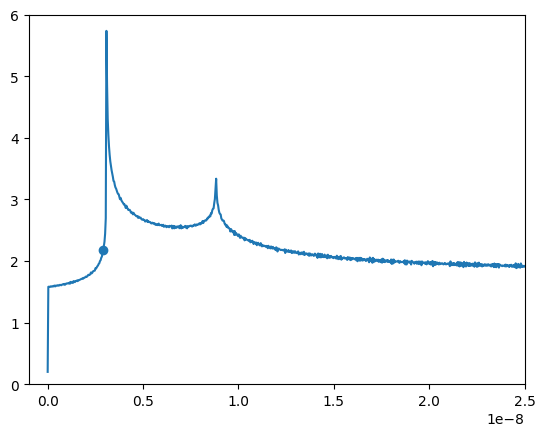

In [40]:
# plt.plot(data[12][:], data_y[12][:])
# plt.scatter(data[12][86], data_y[12][86])
# plt.xlim(-1e-9, 0.25e-7)
# plt.ylim(0, 6)

(0.0, 6.0)

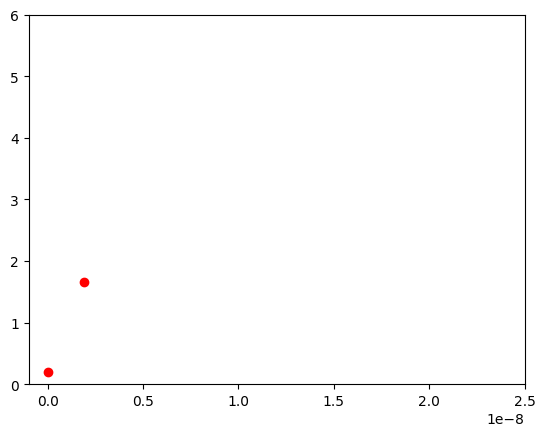

In [46]:
# y = data_y[0][:]
# x = data[0][:]

# peaks, _ = find_peaks(y, prominence=0.5, distance=10)

# # Compute first derivative
# dy = np.diff(y)
# dx = np.diff(x)
# gradient = dy / dx

# # Set a threshold to detect sharp changes (potential discontinuities)
# threshold = np.percentile(np.abs(gradient), 99.99)  # Top 5% of changes
# potential_discontinuities = np.where(np.abs(gradient) > threshold)[0]

# # Remove points near peaks
# peak_mask = np.zeros_like(gradient, dtype=bool)
# for peak in peaks:
#     peak_mask[max(0, peak - 10):min(len(gradient), peak + 10)] = True

# discontinuities = [idx for idx in potential_discontinuities if not peak_mask[idx]]

# # Compute second derivative
# second_derivative = np.diff(gradient)

# # Threshold for discontinuities
# second_threshold = np.percentile(np.abs(second_derivative), 99.99)
# true_discontinuities = np.where(np.abs(second_derivative) > second_threshold)[0]

# # Exclude points near peaks
# discontinuities_filtered = [
#     idx for idx in true_discontinuities if not peak_mask[idx]
# ]

# plt.scatter(x[discontinuities], y[discontinuities], color='red', label="Discontinuities")
# plt.xlim(-1e-9, 0.25e-7)
# plt.ylim(0, 6)

In [16]:
import pywt

widths = np.arange(1, 10)  # Scales to detect peaks
cwt_matrix = pywt.cwt(data_y[0][:], widths, 'mexh')[0]

peak_indices = np.argwhere(cwt_matrix.max(axis=0) > threshold)

NameError: name 'threshold' is not defined

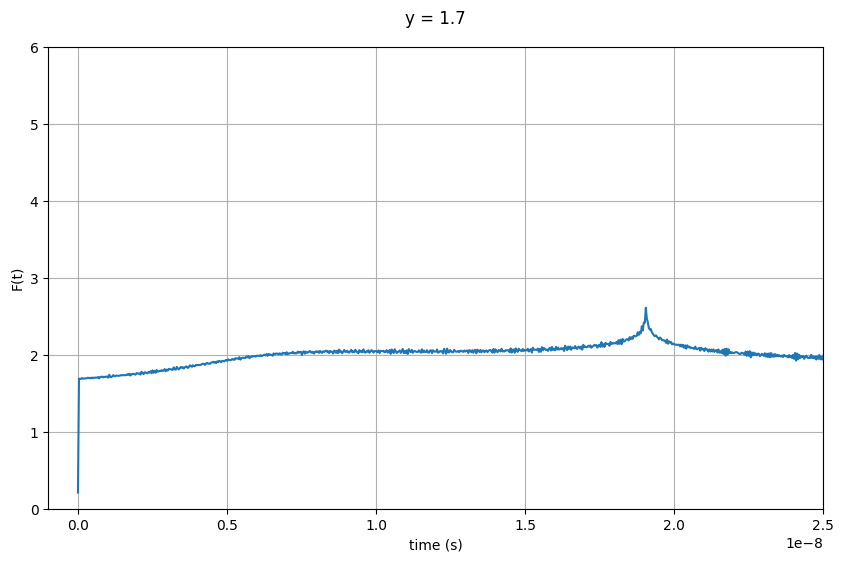

In [13]:
from IPython.display import HTML
def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def update(frame):
    x_data, y_data = data[frame][:], data_y[frame][:]
    # print(y_data)  # Keep the print statement as requested
    
    line.set_data(x_data, y_data)
    ym = ys[frame]
    title.set_text(f'y = {ym}')
    
    # Update the axis limits if needed
    ax.relim()
    ax.set_xlim(-1e-9, 0.25e-7)
    ax.set_ylim(0, 6)
    ax.autoscale_view()
    
    return line, title

# Set up the figure and animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [])  # Blue line for the curve
title = ax.text(0.5, 1.05, "", ha="center", transform=ax.transAxes, fontsize=12)

# Add grid and labels
ax.grid(True)
ax.set_xlabel('time (s)')
ax.set_ylabel('F(t)')

# Create the animation
anim = FuncAnimation(fig, update, frames=len(ys), interval=100, 
                    init_func=init, blit=True)

# FFwriter = FFMpegWriter()
# anim.save('Ft.mp4', writer = FFwriter, fps=100)

# anim.save('Ft_ani_slow.gif', writer=PillowWriter(fps=2, bitrate=1800))
HTML(anim.to_jshtml())

# save_animation(anim, 'Ft_cusp.mp4', fps=30)
# plt.show()

In [99]:
source_files = ['data/source_{}.npz'.format(y) for y in ys]

In [100]:
caus_ra, caus_dec, macro_ra, macro_dec, lens_ra, lens_dec = [], [], [], [], [], []

In [101]:
for f in source_files:
    file = np.load(f)
    caus_ra.append(file['caus_ra'])
    caus_dec.append(file['caus_dec'])
    macro_ra.append(file['macro_ra'])
    macro_dec.append(file['macro_dec'])
    lens_ra.append(file['lens_ra'])
    lens_dec.append(file['lens_dec'])

In [103]:
for (i, f) in enumerate(source_files):
    # file = np.load(f)
    # ori_x = lens_ra[i]
    # ori_y = lens_dec[i]
    # caus_ra[i] -= ori_x
    # caus_dec[i] -= ori_y
    # macro_ra[i] -= ori_x
    # macro_dec[i] -= ori_y
    lens_ra[i] = 0.
    lens_dec[i] = 0.

In [15]:
x_source = [caus_ra, macro_ra, lens_ra]  # x-coordinates for each curve
y_source = [caus_dec, macro_dec, lens_dec]  # y-coordinates for each curve

In [113]:
macro_ra1 = np.array(macro_ra)[:, 0]
macro_dec1 = np.array(macro_dec)[:, 0]

In [114]:
macro_ra1

array([-1.76406638e-11, -1.87433620e-11, -1.98460609e-11, -2.09487604e-11,
       -2.20514606e-11, -2.31541615e-11, -2.42568630e-11, -2.53595652e-11,
       -2.64622681e-11, -2.75649717e-11, -2.86676759e-11, -2.97703808e-11,
       -3.08730863e-11, -3.19757926e-11, -3.30784995e-11, -3.41812071e-11,
       -3.52839153e-11, -3.63866242e-11, -3.74893338e-11, -3.85920441e-11,
       -3.96947550e-11, -4.07974666e-11, -4.19001789e-11, -4.30028918e-11,
       -4.41056055e-11, -4.52083198e-11, -4.63110347e-11, -4.74137503e-11,
       -4.85164666e-11, -4.96191836e-11, -5.07219013e-11, -5.18246196e-11,
       -5.29273386e-11, -5.40300582e-11, -5.51327785e-11, -5.62354995e-11,
       -5.73382212e-11, -5.84409435e-11, -5.95436666e-11, -6.06463902e-11,
       -6.17491146e-11, -6.28518396e-11, -6.39545653e-11, -6.50572917e-11,
       -6.61600187e-11, -6.72627464e-11, -6.83654748e-11, -6.94682038e-11,
       -7.05709335e-11, -7.16736639e-11, -7.27763950e-11, -7.38791267e-11,
       -7.49818591e-11])

In [25]:
def create_animation(caus_ra, caus_dec, macro_ra, macro_dec, lens_ra, lens_dec):
    """
    Create scatter plot animation with debugging features.
    """
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Initialize scatter plots
    scatter_caus = ax.scatter([], [], label='Caustic', s=10)
    scatter_macro = ax.scatter([], [], label='Macro', s=40)
    scatter_lens = ax.scatter([], [], label='Lens', s=40)
    
    # Add title for debugging
    title = ax.set_title("F: ")
    
    # Set up the axes
    ax.grid(True)
    ax.legend()

    # ax.set_xlim(4.0258e-7, 4.0274e-7)
    # ax.set_ylim(-5e-11, 5e-11)

    ax.set_xlim(-7e-11, 7e-11)
    ax.set_ylim(-5e-11, 5e-11)
    
    def update(frame):
        """Animation function called for each frame"""
        # Update title with frame number
        # title.set_text(f"Frame: {frame}")
        
        # Update caustic data with print statements
        if frame < len(caus_ra):
            # print(f"Frame {frame} - Caustic data shapes: RA {np.array(caus_ra[frame]).shape}, Dec {np.array(caus_dec[frame]).shape}")
            scatter_caus.set_offsets(np.c_[caus_ra[frame], caus_dec[frame]])
        
        # Update macro data
        if frame < len(macro_ra):
            scatter_macro.set_offsets(np.c_[macro_ra[frame], macro_dec[frame]])
        
        # Update lens data
        if frame < len(lens_ra):
            scatter_lens.set_offsets(np.c_[lens_ra[frame], lens_dec[frame]])


        ym = ys[frame]
        title.set_text(f'y = {ym}')
        # Dynamically adjust limits based on current frame data
        # if frame < len(caus_ra):
        #     ax.set_xlim(np.min(caus_ra[frame]) - 1e-7, np.max(caus_ra[frame]) + 1e-7)
        #     ax.set_ylim(np.min(caus_dec[frame]) - 1e-11, np.max(caus_dec[frame]) + 1e-11)
        
        return scatter_caus, scatter_macro, scatter_lens, title
    
    # Find the maximum number of frames
    max_frames = max(len(caus_ra), len(macro_ra), len(lens_ra))

    
    # Create animation
    anim = FuncAnimation(fig, update, 
                        frames=max_frames,
                        interval=100,
                        blit=True)
    
    return anim, fig

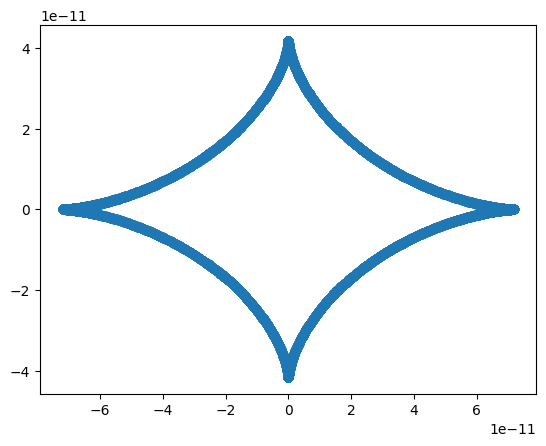

In [104]:
plt.scatter(caus_ra[3], caus_dec[3])

In [98]:
plt.scatter(caus_ra[3], caus_dec[3])

NameError: name 'caus_ra' is not defined

In [112]:
macro_ra1

NameError: name 'macro_ra1' is not defined

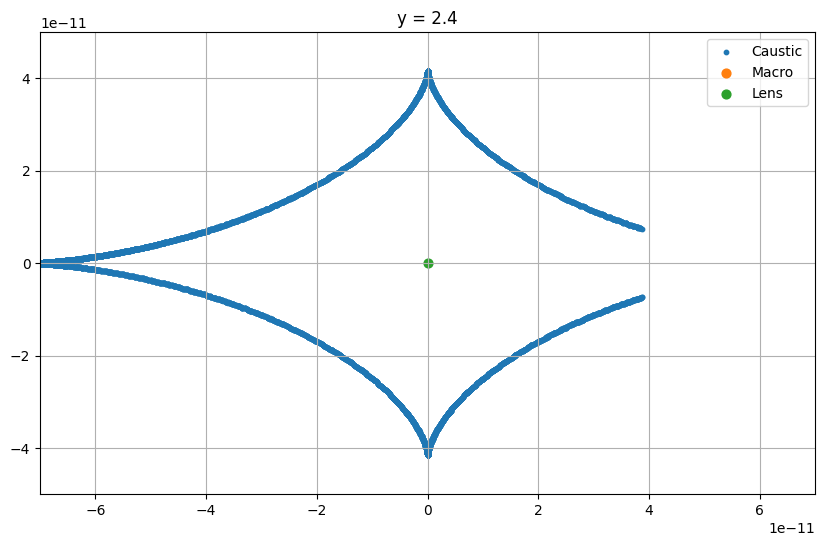

In [31]:
anim, fig = create_animation(caus_ra, caus_dec, macro_ra1, macro_dec1, lens_ra, lens_dec)

# FFwriter = FFMpegWriter()
# anim.save('caustic.mp4', writer = FFwriter, fps=100)

# Display animation in Jupyter notebook
HTML(anim.to_jshtml())

In [38]:
divide = abs(macro_dec1[0]/macro_ra1[0])
result = np.arctan(divide)
result*180/np.pi

18.437721142854993

In [37]:
crit_pt = [macro_ra1[12], macro_dec1[12]]

In [ ]:
import sys
import os
path = os.getcwd()
dir = '/home/manchun.yeung/microlensing/wolensing/wolensing/'
sys.path.append(dir)

from wolensing.lensmodels.hessian import Hessian_Td
from lensmodels.trip_d import total_triple_d

In [ ]:
save_animation(anim, 'caustic.mp4', fps=30)

In [33]:
divide = abs(macro_dec1[3]/macro_ra1[3])
np.arctan(divide)

0.32179382212834573

In [110]:
caus_ra

[array([-4.03677809e-12, -4.03527066e-12, -3.88794713e-12, ...,
         3.89760704e-12,  4.04501832e-12,  4.04652366e-12]),
 array([-3.91080783e-12, -3.90926813e-12, -3.76477759e-12, ...,
         4.17520335e-12,  4.32855330e-12,  4.32998319e-12]),
 array([-3.64415050e-12, -3.64254155e-12, -3.50397550e-12, ...,
         4.30644109e-12,  4.46263158e-12,  4.46402622e-12]),
 array([-3.38866955e-12, -3.38699576e-12, -3.25433543e-12, ...,
         4.60063308e-12,  4.76276143e-12,  4.76407490e-12]),
 array([-3.01580525e-12, -3.01403902e-12, -2.89032964e-12, ...,
         4.73980676e-12,  4.90477605e-12,  4.90605150e-12]),
 array([-2.78831659e-12, -2.78649749e-12, -2.66861274e-12, ...,
         1.01865867e-13,  1.15605603e-13,  1.17059086e-13]),
 array([-2.45780847e-12, -2.45591594e-12, -2.34682587e-12, ...,
         7.33990228e-13,  7.86287543e-13,  7.88327594e-13]),
 array([-2.15247102e-12, -2.15051746e-12, -2.05008802e-12, ...,
         1.15259252e-12,  1.22255756e-12,  1.22462681e-12]),


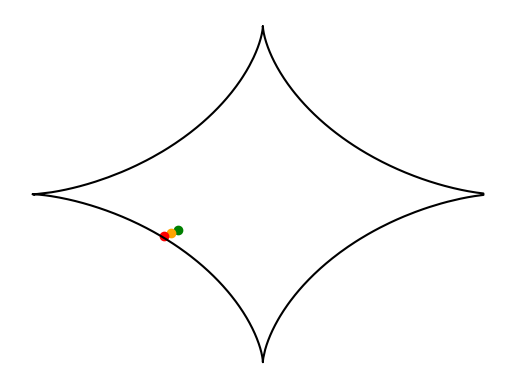

In [117]:
x = np.array(caus_ra[-1])
y = np.array(caus_dec[-1])
# points = np.array([ra_caustic_list, dec_caustic_list])

r = np.sqrt(x**2+y**2)
theta = np.arctan2(y, x) # Angle in radians
sorted_indices = np.argsort(theta)
plt.plot(x[sorted_indices], y[sorted_indices], color='black')

colorlist = ['green', 'orange', 'red']

indices = [8, 10, 12]
for i, index in enumerate(indices):
    plt.scatter(macro_ra1[index], macro_dec1[index], color=colorlist[i])

plt.axis('off')
plt.savefig('caus.png')
plt.show()